In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv(r"C:\INES\chp\chp_data_oneyear\chp_data_oneyear\Batch 1\data_127-0-0-1_2024-12-20 (0).csv", encoding = 'cp1252', sep = ';', skiprows=1)

In [5]:
data.head(1)

,Description,Temperatur Vorlauf BHKW 2 (Heizzentrale),Temperatur Vorlauf BHKW 1 (Heizzentrale),Volumenstrom BHKW 2 (Heizzentrale),Betriebszustand BHKW 2 (Heizzentrale),Heizleistung BHKW 2 (Heizzentrale),Stromzähler BHKW 2 (Heizzentrale) Leistung,Betriebszustand BHKW 1 (Heizzentrale),Temperatur Rücklauf BHKW 1 (Heizzentrale),Heizleistung BHKW 1 (Heizzentrale),Temperatur Rücklauf BHKW 2 (Heizzentrale),Stromzähler BHKW 1 (Heizzentrale) Leistung,Volumenstrom BHKW 1 (Heizzentrale)
0,2024/12/15 00:00:00,86.5,81.1,2.51,0.0,102.7,NaN,1.0,52.8,107.56,53.2,NaN,3.05


In [6]:
chp1 = data.loc[:, data.columns.str.contains('BHKW 2')]

In [7]:
chp1.head()

,Temperatur Vorlauf BHKW 2 (Heizzentrale),Volumenstrom BHKW 2 (Heizzentrale),Betriebszustand BHKW 2 (Heizzentrale),Heizleistung BHKW 2 (Heizzentrale),Stromzähler BHKW 2 (Heizzentrale) Leistung,Temperatur Rücklauf BHKW 2 (Heizzentrale)
0,86.50,2.51,0.0,102.70,NaN,53.20
1,86.65,2.52,0.0,103.36,50.60,53.20
2,86.50,2.52,0.0,103.26,50.48,53.20
3,86.55,2.52,0.0,103.35,50.60,53.25
4,86.55,2.54,0.0,103.80,50.60,53.30


In [8]:
chp1['Time'] = data['Description']

chp1['Time']= pd.to_datetime(chp1['Time'])
chp1.set_index('Time', inplace= True)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_29244\1299648038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1['Time'] = data['Description']
C:\Users\Aqib\AppData\Local\Temp\ipykernel_29244\1299648038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1['Time']= pd.to_datetime(chp1['Time'])


In [9]:
chp1.index.dtype
# data['Description'].dtype


dtype('<M8[ns]')

In [10]:
chp1.columns

Index(['Temperatur Vorlauf BHKW 2 (Heizzentrale)',
       'Volumenstrom BHKW 2 (Heizzentrale)',
       'Betriebszustand BHKW 2 (Heizzentrale)',
       'Heizleistung BHKW 2 (Heizzentrale)',
       'Stromzähler BHKW 2 (Heizzentrale) Leistung',
       'Temperatur Rücklauf BHKW 2 (Heizzentrale)'],
      dtype='object')

In [11]:
clmns = {'Temperatur Vorlauf BHKW 2 (Heizzentrale)' : 'Temperatur Vorlauf',
       'Betriebszustand BHKW 2 (Heizzentrale)' : 'Betriebszustand',
       'Temperatur Rücklauf BHKW 2 (Heizzentrale)': 'Temperatur Rücklauf',
        'Heizleistung BHKW 2 (Heizzentrale)': 'Heizleistung',
        'Stromzähler BHKW 2 (Heizzentrale) Leistung': 'Stromzähler Leistung',
        'Volumenstrom BHKW 2 (Heizzentrale)': 'Volumenstrom'}

In [12]:
chp1.rename(columns = clmns, inplace = True)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_29244\209734648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1.rename(columns = clmns, inplace = True)


In [13]:
chp1['switch'] = chp1['Betriebszustand'] != chp1['Betriebszustand'].shift(1)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_29244\3234059368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1['switch'] = chp1['Betriebszustand'] != chp1['Betriebszustand'].shift(1)


In [14]:
startup = chp1[(chp1['Heizleistung'] < 100) & (chp1['Betriebszustand'] == 0)]

In [15]:
firstswitch = startup[startup['switch']].index[0]  #the switch column has bool datatype

In [16]:
startup = startup.loc[firstswitch:,:]  # just to start from the first off to start up switch

In [17]:
for row in startup.itertuples():
    print(row.Index)

2024-12-15 05:07:00
2024-12-15 05:08:00
2024-12-15 05:09:00
2024-12-15 05:10:00
2024-12-15 05:11:00
2024-12-15 05:12:00
2024-12-15 05:13:00
2024-12-15 05:14:00
2024-12-15 05:15:00
2024-12-15 05:16:00
2024-12-15 05:17:00
2024-12-15 05:18:00
2024-12-15 05:20:00
2024-12-15 05:21:00
2024-12-15 05:22:00
2024-12-15 05:23:00
2024-12-15 05:24:00
2024-12-15 05:25:00
2024-12-15 06:19:00
2024-12-15 06:20:00
2024-12-15 06:21:00
2024-12-15 06:22:00
2024-12-15 06:23:00
2024-12-15 06:24:00
2024-12-15 06:25:00
2024-12-15 06:26:00
2024-12-15 06:27:00
2024-12-15 06:28:00
2024-12-15 06:29:00
2024-12-15 06:30:00
2024-12-15 06:31:00
2024-12-15 06:32:00
2024-12-15 06:33:00
2024-12-15 06:34:00
2024-12-15 10:01:00
2024-12-15 10:02:00
2024-12-15 10:03:00
2024-12-15 10:04:00
2024-12-15 10:05:00
2024-12-15 10:06:00
2024-12-15 10:07:00
2024-12-15 10:08:00
2024-12-15 10:09:00
2024-12-15 10:10:00
2024-12-15 10:11:00
2024-12-15 10:16:00
2024-12-15 10:17:00
2024-12-15 10:18:00
2024-12-15 12:47:00
2024-12-15 12:50:00


In [18]:
# startup['counter'] = np.full(len(startup), 0)

In [19]:
val = 0
Tplus_list = []
for i, rows in enumerate(startup.itertuples()):
    if rows.switch:  # check if switch is true
        val = 0
    
    Tplus_list.append(val)
    val += 1

In [20]:
Tplus_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,


In [21]:
startup['T_plus'] = Tplus_list

In [22]:
import matplotlib.pyplot as plt

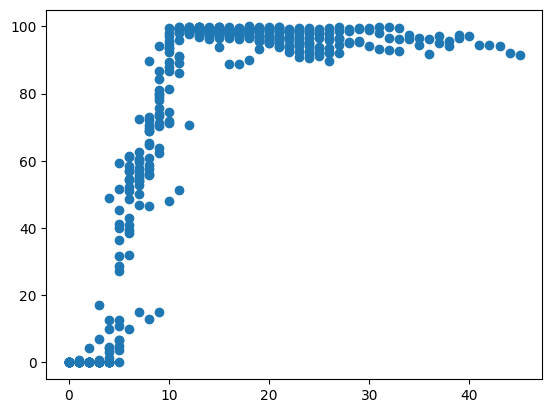

In [23]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o')

In [24]:
startup['time_step'] = (startup['T_plus'] // 15) * 15

In [25]:
startup_15min = startup.groupby(by = 'time_step').mean()


Text(0, 0.5, 'Power output in Kw')

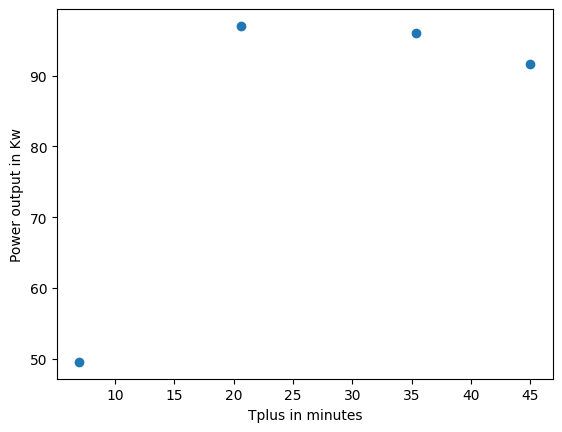

In [26]:
plt.plot(startup_15min['T_plus'], startup_15min['Heizleistung'], 'o')
plt.xlabel('Tplus in minutes')
plt.ylabel('Power output in Kw')

In [27]:
# pip install scikit-learn
startup_15min = startup.resample('15T').mean()
startup_15min.head()

,Temperatur Vorlauf,Volumenstrom,Betriebszustand,Heizleistung,Stromzähler Leistung,Temperatur Rücklauf,switch,T_plus,time_step
Time,,,,,,,,,
2024-12-15 05:00:00,64.26875,0.82125,0.0,15.4425,42.99875,45.58125,0.125,3.5,0.0
2024-12-15 05:15:00,89.34000,2.12900,0.0,92.4540,50.55800,53.29500,0.000,12.5,4.5
2024-12-15 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-15 05:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-15 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### line fit

In [61]:
coefficients = np.polyfit(startup.loc[startup['T_plus']<11, 'T_plus'], startup.loc[startup['T_plus']<11, 'Heizleistung'], 1)
slope, intercept = coefficients

In [77]:
filtered = startup[startup['T_plus']<11]

In [78]:
coefficients = np.polyfit(filtered['T_plus'], filtered['Heizleistung'], 1)
slope, intercept = coefficients

In [79]:
x = np.arange(0,30,1/60)

In [80]:
y = intercept + slope*x


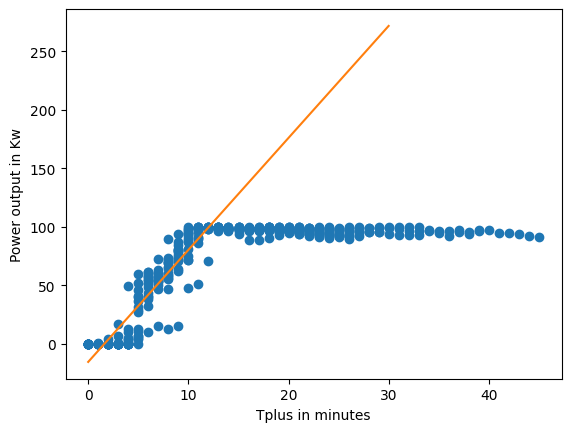

In [81]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o')
plt.xlabel('Tplus in minutes')
plt.ylabel('Power output in Kw')
plt.plot(x,y)
plt.show()

In [82]:
intercept, slope

(-15.617045454545444, 9.586136363636363)

In [83]:
# y1 = intercept + slope*12

# y1

### Finding average

In [36]:
startup.loc[startup['T_plus']<16, 'Heizleistung'].mean()

52.6126953125

### scikit

In [37]:
from sklearn.linear_model import LinearRegression

In [65]:
# x,y = list(filtered['T_plus']), list(filtered['Heizleistung'])

# x = np.array(x).reshape(-1, 1)
# model = LinearRegression()
# model.fit(x,y)
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)


Coefficients: [9.58613636]
Intercept: -15.617045454545448


In [40]:
# pip install statsmodels

In [41]:
import statsmodels.formula.api as smf 

In [84]:
results = smf.ols('Heizleistung ~ T_plus', data = filtered).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heizleistung   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     742.2
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.14e-64
Time:                        14:18:35   Log-Likelihood:                -722.52
No. Observations:                 176   AIC:                             1449.
Df Residuals:                     174   BIC:                             1455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.6170      2.082     -7.502      0.000     -19.726     -11.509
T_plus         9.5861      0.352     27.244      0.000       8.892      10.281
==============================================================================
Omnibus:                       20.655   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.181
Skew:                          -0.829   Prob(JB):                     5.61e-06
Kurtosis:                       3.738   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
filtered['T_plus2'] = filtered['T_plus']**2

C:\Users\Aqib\AppData\Local\Temp\ipykernel_29244\2180482959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['T_plus2'] = filtered['T_plus']**2


In [86]:
results = smf.ols('Heizleistung ~ T_plus + T_plus2', data = filtered).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heizleistung   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     467.4
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.75e-70
Time:                        14:18:38   Log-Likelihood:                -705.30
No. Observations:                 176   AIC:                             1417.
Df Residuals:                     173   BIC:                             1426.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1086      2.557     -1.998      0.047     -10.155      -0.062
T_plus         2.5805      1.190      2.169      0.031       0.233       4.928
T_plus2        0.7006      0.115      6.115      0.000       0.474       0.927
==============================================================================
Omnibus:                       30.992   Durbin-Watson:                   0.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.962
Skew:                          -0.751   Prob(JB):                     8.69e-17
Kurtosis:                       5.798   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
intercept, tplus, tplus2 = results.params

In [90]:
y2 = intercept + tplus*x + tplus2*(x**2)

In [91]:
y2

array([ -5.10858829,  -5.06538538,  -5.02179327, ..., 700.5848244 ,
       701.32742351, 702.07041182])

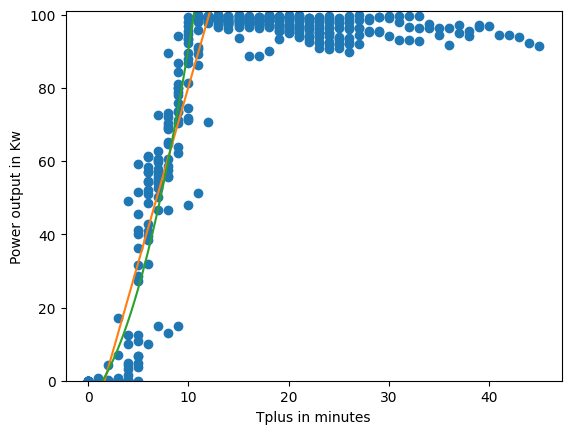

In [95]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o')
plt.xlabel('Tplus in minutes')
plt.ylabel('Power output in Kw')
plt.plot(x,y)
plt.plot(x,y2)
plt.ylim(0,101)
plt.show()